Example of how to extract and plot continuous data saved in Blackrock nsX data files
current version: 1.1.1 --- 07/22/2016

@author: Mitch Frankel - Blackrock Microsystems

```
Version History:
v1.0.0 - 07/05/2016 - initial release - requires brpylib v1.0.0 or higher
v1.1.0 - 07/12/2016 - addition of version checking for brpylib starting with v1.2.0
                      minor code cleanup for readability
v1.1.1 - 07/22/2016 - now uses 'samp_per_sec' as returned by NsxFile.getdata()
                      minor modifications to use close() functionality of NsxFile class
v2.0.0 - 05/11/2023 - Refactored as Jupyter notebook and updated to brpylib 2.0.2 - Chadwick Boulay
```

The next cell is tagged as 'parameters'. These parameters can be modified using `papermill`. [See here](https://papermill.readthedocs.io/en/latest/usage-parameterize.html) for more info.

In [1]:
datafile = ""
start_time_s = 1.0
plot_chan = 5

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import brpylib

In [3]:
if int(brpylib.brpylib_ver.split(".")[0]) < 2:
    raise Exception(f"Old library version unsupported: {brpylib.brpylib_ver}")

In [4]:
if datafile:
    datapath = Path(datafile)
else:
    datapath = Path.home() / "sampledata" / "array_Sc2.ns6"
if not datapath.exists():
    raise NameError(f"Datafile {str(datapath)} does not exist.")


In [5]:
elec_ids     = list(range(1, 97))      # 'all' is default for all (1-indexed)
data_time_s  = 2.0                     # 'all' is default for all
downsample   = 1                       # 1 is default

In [20]:
# Open file and extract headers
nsx_file = brpylib.NsxFile(str(datapath))

# Extract data - note: data will be returned based on *SORTED* elec_ids, see cont_data['elec_ids']
cont_data = nsx_file.getdata(elec_ids, start_time_s, data_time_s, downsample, full_timestamps=True)

# Close the nsx file now that all data is out
nsx_file.close()


array_Sc2.ns6 opened

array_Sc2.ns6 closed


In [24]:
# Plot the data channel
seg_id = 0
ch_idx  = cont_data["elec_ids"].index(plot_chan)
t = cont_data["data_headers"][seg_id]["Timestamp"] / cont_data["samp_per_s"]

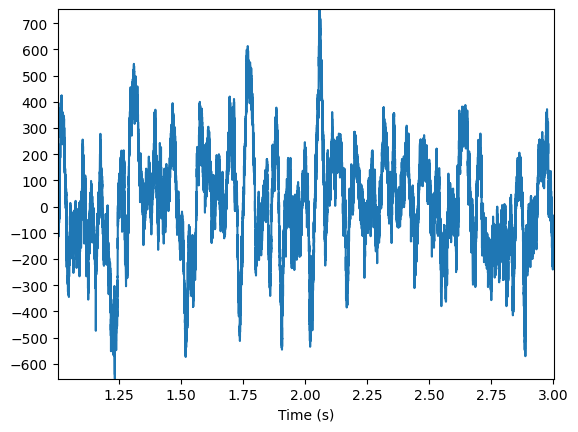

In [27]:
plt.plot(t, cont_data["data"][seg_id][ch_idx])
plt.axis([t[0], t[-1], min(cont_data["data"][seg_id][ch_idx]), max(cont_data["data"][seg_id][ch_idx])])
plt.locator_params(axis="y", nbins=20)
plt.xlabel("Time (s)")
# plt.ylabel("Output (" + nsx_file.extended_headers[hdr_idx]['Units'] + ")")
# plt.title(nsx_file.extended_headers[hdr_idx]['ElectrodeLabel'])
plt.show()